In [1]:
### import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
#load our data

fifadf=pd.read_csv("fifa_data.csv")

fifadf.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

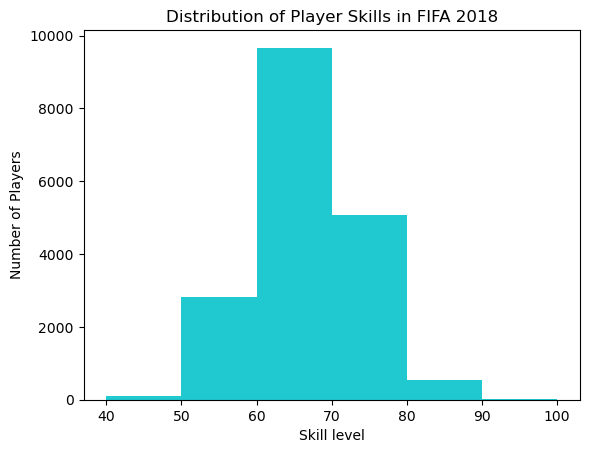

In [36]:
bins=np.arange(40,110,10).tolist()

plt.hist(fifadf.Overall, bins=bins,color="#1fc9cf")

plt.xticks(bins)

plt.ylabel("Number of Players")
plt.xlabel("Skill level")
plt.title('Distribution of Player Skills in FIFA 2018')




plt.show()


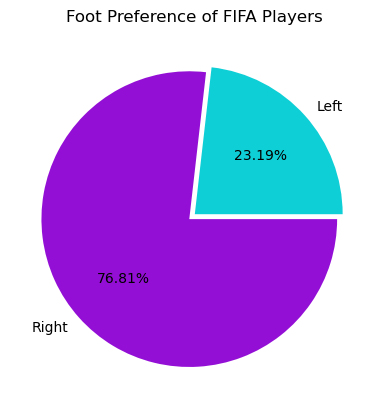

In [260]:
left=fifadf[fifadf["Preferred Foot"]=="Left"].shape[0]
right=fifadf[fifadf["Preferred Foot"]=="Right"].shape[0]

labels=["Left","Right"]
colors=["#0fcfd6","#940fd6"]
explodes=[0,0.05]

plt.pie([left,right],colors=colors, labels=labels, autopct='%.2f%%', explode=explodes)
plt.title("Foot Preference of FIFA Players")
plt.show()

In [ ]:
### Weight Distributtion Pie Chart

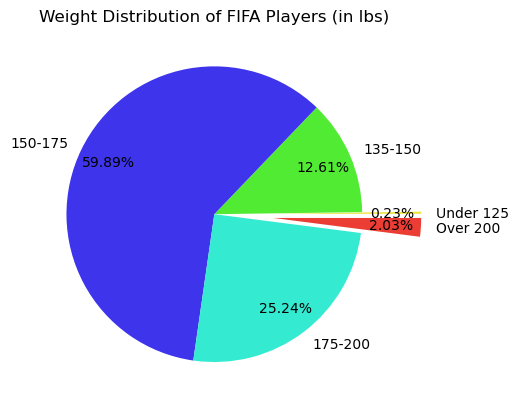

In [224]:
fifadf['Weight']=[int(x.strip('lbs')) if type(x)==str else x for x in fifadf['Weight']]

light=fifadf.loc[fifadf.Weight<125].shape[0]
medium_light=fifadf.loc[(fifadf.Weight>=125) & (fifadf.Weight<150)].shape[0]
medium=fifadf.loc[(fifadf.Weight>=150) & (fifadf.Weight<175)].shape[0]
medium_heavy=fifadf.loc[(fifadf.Weight>=175) & (fifadf.Weight<200)].shape[0]
heavy=fifadf.loc[(fifadf.Weight>=200)].shape[0]

weights=[light,medium_light,medium,medium_heavy,heavy]
labels=["Under 125","135-150","150-175","175-200","Over 200"]
explodes=[0.4,0,0,0,0.4]
colorsW=["#ebe534","#52eb34","#3d34eb","#34ebd2","#eb3d34"] 
plt.pie(weights,labels=labels,explode=explodes,autopct='%.2f%%',pctdistance=0.8,colors=colorsW)
plt.title("Weight Distribution of FIFA Players (in lbs)")
plt.show()

In [166]:
colnum=len(list(fifadf.columns.values))
print(colnum)

89


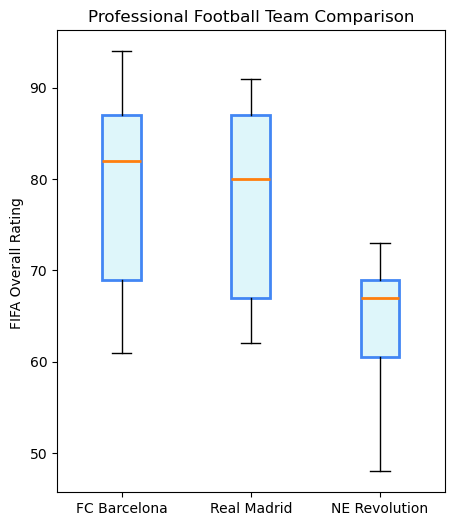

In [258]:
barcelona=fifadf.loc[fifadf.Club=="FC Barcelona"]["Overall"]
madrid=fifadf.loc[fifadf.Club=="Real Madrid"]["Overall"]
revs=fifadf.loc[fifadf.Club=="New England Revolution"]["Overall"]

plt.figure(figsize=(5,6))


labels=["FC Barcelona","Real Madrid", "NE Revolution"]
"New England Revolution"
boxes=plt.boxplot([barcelona,madrid,revs],labels=labels, patch_artist=True, medianprops={'lw':2})

for box in boxes['boxes']:
    #set edge color
    box.set(color='#4286f4',lw=2)

    #change fill color
    box.set(facecolor="#def6fa")

plt.title("Professional Football Team Comparison")
plt.ylabel("FIFA Overall Rating ")
plt.show()